In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_hyperplane(clf, X, y, 
                    h=0.02, 
                    draw_sv=True, 
                    title='hyperplan'):
    
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

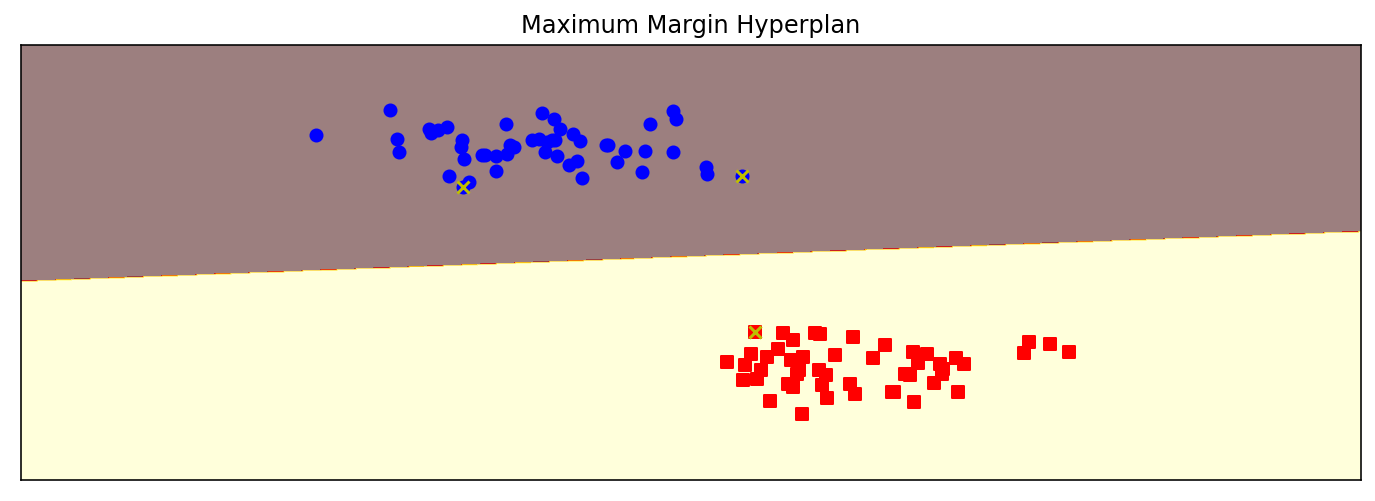

In [17]:
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, 
                  random_state=0, cluster_std=0.3)
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X, y)

# 预测
# clf.predict(X)

plt.figure(figsize=(12, 4), dpi=144)
plot_hyperplane(clf, X, y, h=0.01, 
                title='Maximum Margin Hyperplan')

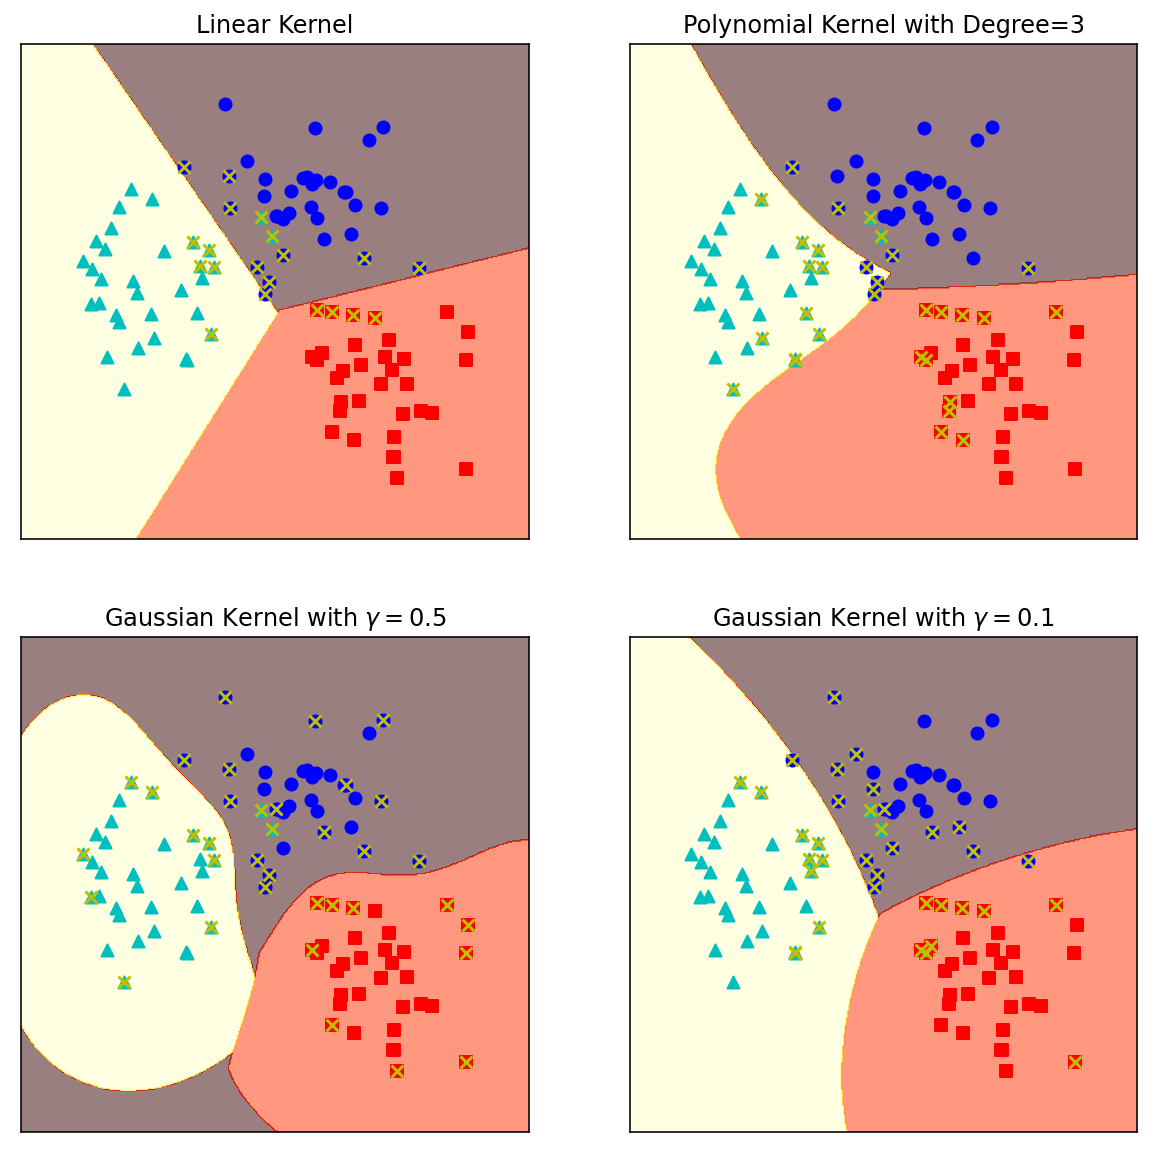

In [8]:
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=3, 
                  random_state=0, cluster_std=0.8)
clf_linear = svm.SVC(C=1.0, kernel='linear')
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3)
clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)
clf_rbf2 = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)

plt.figure(figsize=(10, 10), dpi=144)

clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf2]
titles = ['Linear Kernel', 
          'Polynomial Kernel with Degree=3', 
          'Gaussian Kernel with $\gamma=0.5$', 
          'Gaussian Kernel with $\gamma=0.1$']
for clf, i in zip(clfs, range(len(clfs))):
    clf.fit(X, y)
    plt.subplot(2, 2, i+1)
    plot_hyperplane(clf, X, y, title=titles[i])

# 原理介绍

1.linear核函数:
K(xi,xj)=xTixj



2.polynomial核函数:
K(xi,xj)=(γxTixj+r)d,d>1


3.RBF核函数（高斯核函数）:
K(xi,xj)=exp(−γ||xi−xj||2),γ>0


4.sigmoid核函数:
K(xi,xj)=tanh(γxTixj+r),γ>0,r<0

各自的特点：

1）对于线性核函数，没有专门需要设置的参数

2）对于多项式核函数，有三个参数。-d用来设置多项式核函数的最高次项次数，也就是公式中的d，默认值是3。-g用来设置核函数中的gamma参数设置，也就是公式中的gamma，默认值是1/k（特征数）。-r用来设置核函数中的coef0，也就是公式中的第二个r，默认值是0。

3）对于RBF核函数，有一个参数。-g用来设置核函数中的gamma参数设置，也就是公式中gamma，默认值是1/k（k是特征数）。

4）对于sigmoid核函数，有两个参数。-g用来设置核函数中的gamma参数设置，也就是公式中gamma，默认值是1/k（k是特征数）。-r用来设置核函数中的coef0，也就是公式中的第二个r，默认值是0。

具体来说说rbf核函数中C和gamma ：

SVM模型有两个非常重要的参数C与gamma。其中 C是惩罚系数，即对误差的宽容度。c越高，说明越不能容忍出现误差,容易过拟合。C越小，容易欠拟合。C过大或过小，泛化能力变差

gamma是选择RBF函数作为kernel后，该函数自带的一个参数。隐含地决定了数据映射到新的特征空间后的分布，gamma越大，支持向量越少，gamma值越小，支持向量越多。支持向量的个数影响训练与预测的速度。

这里面大家需要注意的就是gamma的物理意义，大家提到很多的RBF的幅宽，它会影响每个支持向量对应的高斯的作用范围，从而影响泛化性能。我的理解：如果gamma设的太大，方差会很小，方差很小的高斯分布长得又高又瘦， 会造成只会作用于支持向量样本附近，对于未知样本分类效果很差，存在训练准确率可以很高，(如果让方差无穷小，则理论上，高斯核的SVM可以拟合任何非线性数据，但容易过拟合)而测试准确率不高的可能，就是通常说的过训练；而如果设的过小，则会造成平滑效应太大，无法在训练集上得到特别高的准确率，也会影响测试集的准确率。

此外，可以明确的两个结论是：
结论1：样本数目少于特征维度并不一定会导致过拟合，这可以参考余凯老师的这句评论：
“这不是原因啊，呵呵。用RBF kernel, 系统的dimension实际上不超过样本数，与特征维数没有一个trivial的关系。”

结论2：RBF核应该可以得到与线性核相近的效果（按照理论，RBF核可以模拟线性核），可能好于线性核，也可能差于，但是，不应该相差太多。
当然，很多问题中，比如维度过高，或者样本海量的情况下，大家更倾向于用线性核，因为效果相当，但是在速度和模型大小方面，线性核会有更好的表现。

# 半监督学习

https://blog.csdn.net/rosefun96/article/details/109787234

In [1]:
from __future__ import absolute_import
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

# normalization
def normalize(x):
	return (x - np.min(x))/(np.max(x) - np.min(x))

def get_data():
	X, y = datasets.load_breast_cancer(return_X_y=True)
	X = normalize(X)
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 0)
	rng = np.random.RandomState(42)
	random_unlabeled_points = rng.rand(len(X_train)) < 0.1
	y_train[random_unlabeled_points] = -1
	# 
	index, = np.where(y_train != -1)
	label_X_train = X_train[index,:]
	label_y_train = y_train[index]
	index, = np.where(y_train == -1)
	unlabel_X_train = X_train[index,:]
	unlabel_y = -1*np.ones(unlabel_X_train.shape[0]).astype(int)
	return label_X_train, label_y_train, unlabel_X_train, unlabel_y, X_test, y_test

label_X_train, label_y_train, unlabel_X_train, unlabel_y, X_test, y_test = get_data()

# import 
from semisupervised import S3VM
model = S3VM()

model.fit(np.vstack((label_X_train, unlabel_X_train)), np.append(label_y_train, unlabel_y))
# predict
predict = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predict)
# metric
print("accuracy", acc)


D:\Anaconda3\envs\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\envs\python37\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
D:\Anaconda3\envs\python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\Anaconda3\envs\python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
D:\Anaconda3\envs\python37\lib\site-packages\numpy\matrixlib\defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
D:\Anaconda3\envs\python37\lib\site-packages\numpy\matrixlib\defmatrix.py:1109: PendingDeprecationWarning: the matr

accuracy 0.9122807017543859


D:\Anaconda3\envs\python37\lib\site-packages\numpy\matrixlib\defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
